In [82]:
import pandas as pd

In [83]:
player_data=pd.read_csv('/home/kirolos/Desktop/projects/python/practical stat/data/players.csv')
player_data

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick
...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan


### cleaning data by making the height column has the same measurement by inches 

In [84]:
player_data["height_inches"]=player_data["height"].apply(lambda x: int(x.split("-")[0])*12+int(x.split("-")[1])if len(x.split("-"))==2 else int(x))

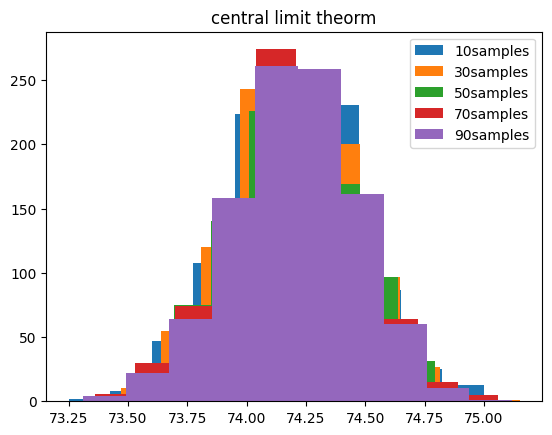

In [85]:
# central limit theorm
import matplotlib.pyplot as plt
sample_amounts=range(10,100,20)
for x in sample_amounts:
    samples=[]
    for i in range(1000):
        samples.append(player_data["height_inches"].sample(100).mean())
    plt.hist(samples)
    plt.legend([str(z)+"samples" for z in sample_amounts])
    plt.title("central limit theorm")
    

### standard error
$SE = \sigma / \sqrt(n)$

In [86]:
player_data["height_inches"].sem()

0.0645649085104296

###  bootstrap

In [87]:
from sklearn.utils import resample
result=[]
for nrepeat in range(1000):
    sample=resample(player_data["height_inches"])
    result.append(sample.median())
result= pd.Series(result)
print("Bootstrap statistics:")
print(f'original: {player_data["height_inches"]}')   
print(f'bias: {result.mean()-player_data["height_inches"].median()}')
print(f'std error: {result.std()}')

Bootstrap statistics:
original: 0       76
1       77
2       76
3       74
4       74
        ..
1674    73
1675    77
1676    76
1677    78
1678    78
Name: height_inches, Length: 1679, dtype: int64
bias: 0.36700000000000443
std error: 0.48222768848702957


### level of confidence and confidence intervals

In [88]:
import numpy as np
import scipy.stats as st
data= player_data["height_inches"][:20]

# create 95% confidence interval for popluation mean weight
st.t.interval(confidence=0.95,df=len(data)-1,loc=np.mean(data),scale=st.sem(data))

(73.97015794805966, 76.42984205194034)

### normal and gaussian distributiion-

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

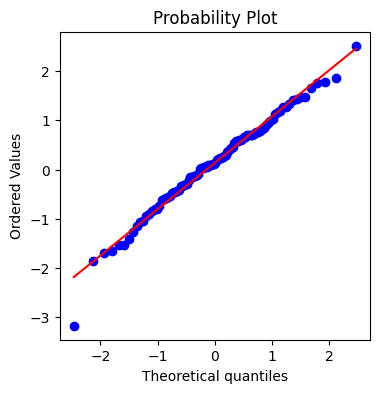

In [91]:
from scipy import stats
fig, ax=plt.subplots(figsize=(4,4))
#ig.plot(4,4)
#sns.distplot(player_data['height_inches'].dropna(), bins=100, color='magenta', ax=ax)
norm_sample=stats.norm.rvs(size=100)
stats.probplot(norm_sample,plot=ax)